## Step 1 : **Load and Explore the Data**

1. Install required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

2. Load Datasets

In [ ]:
pune_df = pd.read_csv("../data/Pune Restaurants.csv")


3. Check basic Information

**For Pune Dataset**

In [3]:
pune_df

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_for1,Known_for2
0,Santè Spa Cuisine,"Continental, Healthy Food, Mediterranean",1200,"Koregaon Park, Pune",4.9,1469,3.9,588,https://www.zomato.com/pune/santè-spa-cuisine-...,"Lane 1, Near Sunderban Resorts, Koregaon Park,...",9.18E+11,18.537416,73.888890,"Bajra Risotto, Spinach Hummus, Whole Wheat Spa...","Nothing to Dislike, Healthy Menu, Healthy Food..."
1,Le Plaisir,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,"Deccan Gymkhana, Pune",4.9,4808,4.3,4959,https://www.zomato.com/pune/le-plaisir-deccan-...,"Survey 759/125, Rajkamal, Prabhat Road, Opposi...",9.19E+11,18.514254,73.838658,"Expresso Panacota, Banana Nutella Crepe, New Y...","Classy Place, Classy Ambience, Perfect Evening..."
2,Gong,"Chinese, Sushi, Asian, Momos, Beverages",1700,"Balewadi High Street, Baner, Pune",4.9,1788,4.3,1352,https://www.zomato.com/pune/gong-baner,"Shop 22/23, Cummins India Office Campus, Balew...",9.19E+11,18.570471,73.774149,"Chicken Minestrone Soup, Crab Ravioli, Ebi Tem...","Classy Place, Quality of Food, Amazing Interio..."
3,The French Window Patisserie,"Cafe, Desserts, French, Bakery, European",600,"Koregaon Park, Pune",4.9,1643,4.4,1208,https://www.zomato.com/pune/the-french-window-...,"Lane Number 5, Ganga Fortune Society, Meera Na...",9.20E+11,18.537432,73.897714,"Trois Chocolat, Chocolate Flan, Mille Feuille,...","Bookshelf, Beautiful Cafe, Pretty Ambience, Pe..."
4,Savya Rasa,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,"Koregaon Park, Pune",4.9,1283,4.3,446,https://www.zomato.com/pune/savya-rasa-koregao...,"Flat 2, Survey 479 & 480, Gera Serenity, North...",9.19E+11,18.538862,73.886621,"Bun Paratha, Pallipalayam Kozhi, Palm Sugar, V...","Sophisticated, Worth the Price, Warm Ambience,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,Atharva Pure Veg,"North Indian, South Indian, Chinese, Fast Food...",600,"Bhosari, Pune",3.0,45,NaN,0,https://www.zomato.com/pune/atharva-pure-veg-b...,"Hajare Vasti, Pune-Nashik Highway, Moshi, Bhos...",9.19604E+11,18.664086,73.848660,"Bar Food, North Indian, Fast Food, Italian, St...",NaN
4793,Wow! Momo,"Momos, Tibetan, Fast Food",400,"Kothrud, Pune",3.0,63,4.1,1212,https://www.zomato.com/pune/wow-momo-kothrud,"Shop 32, Ground Floor, Karishma Society, Kothr...",9.17596E+11,18.502520,73.821746,"Student Crowd, Elaborate Menu, Great Portions,...",NaN
4794,Fried Chicken Destination,Fast Food,400,"Kothrud, Pune",3.0,7,3.9,359,https://www.zomato.com/pune/fried-chicken-dest...,"Shop 5, Khandoba Sadan Building, Kothrud, Pune",9.18011E+11,18.501703,73.813066,"Worth the Money, Timely Service, Great Portion...",NaN
4795,Hotel Shree Yash,"North Indian, Biryani, Mughlai, Maharashtrian,...",1000,"Bhosari, Pune",3.0,20,4.1,491,https://www.zomato.com/pune/hotel-shree-yash-b...,"108, S Block, MIDC, Bhosari, Pune",9.12027E+11,18.623934,73.839943,NaN,NaN


In [4]:
pune_df.head()      # shows first 5 rows of the datasets

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_for1,Known_for2
0,Santè Spa Cuisine,"Continental, Healthy Food, Mediterranean",1200,"Koregaon Park, Pune",4.9,1469,3.9,588,https://www.zomato.com/pune/santè-spa-cuisine-...,"Lane 1, Near Sunderban Resorts, Koregaon Park,...",9.18E+11,18.537416,73.888890,"Bajra Risotto, Spinach Hummus, Whole Wheat Spa...","Nothing to Dislike, Healthy Menu, Healthy Food..."
1,Le Plaisir,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,"Deccan Gymkhana, Pune",4.9,4808,4.3,4959,https://www.zomato.com/pune/le-plaisir-deccan-...,"Survey 759/125, Rajkamal, Prabhat Road, Opposi...",9.19E+11,18.514254,73.838658,"Expresso Panacota, Banana Nutella Crepe, New Y...","Classy Place, Classy Ambience, Perfect Evening..."
2,Gong,"Chinese, Sushi, Asian, Momos, Beverages",1700,"Balewadi High Street, Baner, Pune",4.9,1788,4.3,1352,https://www.zomato.com/pune/gong-baner,"Shop 22/23, Cummins India Office Campus, Balew...",9.19E+11,18.570471,73.774149,"Chicken Minestrone Soup, Crab Ravioli, Ebi Tem...","Classy Place, Quality of Food, Amazing Interio..."
3,The French Window Patisserie,"Cafe, Desserts, French, Bakery, European",600,"Koregaon Park, Pune",4.9,1643,4.4,1208,https://www.zomato.com/pune/the-french-window-...,"Lane Number 5, Ganga Fortune Society, Meera Na...",9.20E+11,18.537432,73.897714,"Trois Chocolat, Chocolate Flan, Mille Feuille,...","Bookshelf, Beautiful Cafe, Pretty Ambience, Pe..."
4,Savya Rasa,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,"Koregaon Park, Pune",4.9,1283,4.3,446,https://www.zomato.com/pune/savya-rasa-koregao...,"Flat 2, Survey 479 & 480, Gera Serenity, North...",9.19E+11,18.538862,73.886621,"Bun Paratha, Pallipalayam Kozhi, Palm Sugar, V...","Sophisticated, Worth the Price, Warm Ambience,..."


In [5]:
pune_df.info()      # display data types and missing values                             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        4797 non-null   object 
 1   Category               4797 non-null   object 
 2   Pricing_for_2          4797 non-null   int64  
 3   Locality               4797 non-null   object 
 4   Dining_Rating          4797 non-null   float64
 5   Dining_Review_Count    4797 non-null   int64  
 6   Delivery_Rating        3226 non-null   float64
 7   Delivery_Rating_Count  4797 non-null   int64  
 8   Website                4797 non-null   object 
 9   Address                4797 non-null   object 
 10  Phone_No               4797 non-null   object 
 11  Latitude               4797 non-null   float64
 12  Longitude              4797 non-null   float64
 13  Known_for1             4155 non-null   object 
 14  Known_for2             1078 non-null   object 
dtypes: f

In [6]:
pune_df.describe()      # Gives summary statistics of numerical columns

,Pricing_for_2,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Latitude,Longitude
count,4797.000000,4797.000000,4797.000000,3226.000000,4797.000000,4797.000000,4797.000000
mean,571.867834,3.629748,182.439233,3.837260,913.103189,18.549262,73.835703
std,425.309842,0.350933,482.759166,0.284843,2522.973728,0.067471,0.085912
min,100.000000,3.000000,0.000000,2.400000,0.000000,18.321548,73.297426
25%,300.000000,3.400000,11.000000,3.700000,7.000000,18.503244,73.790063
50%,450.000000,3.600000,36.000000,3.900000,82.000000,18.540623,73.837188
75%,700.000000,3.900000,137.000000,4.000000,605.000000,18.590621,73.897032
max,4300.000000,4.900000,8152.000000,4.500000,56700.000000,18.842622,74.177275


## Step 2: **Data Cleaning & Preprocessing**

### 2.1  Handle missing values:

In [7]:
pune_df.isnull().sum()

Restaurant_Name             0
Category                    0
Pricing_for_2               0
Locality                    0
Dining_Rating               0
Dining_Review_Count         0
Delivery_Rating          1571
Delivery_Rating_Count       0
Website                     0
Address                     0
Phone_No                    0
Latitude                    0
Longitude                   0
Known_for1                642
Known_for2               3719
dtype: int64

In [8]:
pune_df.duplicated().sum()

np.int64(0)

In [9]:
# Filling missing values in Delivery rating with median
#pune_df['Delivery_Rating'] = pune_df['Delivery_Rating'].fillna(pune_df['Delivery_Rating'].median(), inplace=True) 
avg_rating = pune_df['Delivery_Rating'].mean()
pune_df['Delivery_Rating'].fillna(avg_rating, inplace=True)

C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_15564\4059004423.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pune_df['Delivery_Rating'].fillna(avg_rating, inplace=True)


In [10]:
pune_df.isnull().sum()

Restaurant_Name             0
Category                    0
Pricing_for_2               0
Locality                    0
Dining_Rating               0
Dining_Review_Count         0
Delivery_Rating             0
Delivery_Rating_Count       0
Website                     0
Address                     0
Phone_No                    0
Latitude                    0
Longitude                   0
Known_for1                642
Known_for2               3719
dtype: int64

In [11]:
# Fill missing values in Known_for1 and Known_for2 with  "Not Available"
pune_df['Known_for1'].fillna("Not Availabel", inplace=True)
pune_df['Known_for2'].fillna("Not Availabel", inplace=True)

C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_15564\2631574670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pune_df['Known_for1'].fillna("Not Availabel", inplace=True)
C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_15564\2631574670.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [12]:
pune_df.isnull().sum()

Restaurant_Name          0
Category                 0
Pricing_for_2            0
Locality                 0
Dining_Rating            0
Dining_Review_Count      0
Delivery_Rating          0
Delivery_Rating_Count    0
Website                  0
Address                  0
Phone_No                 0
Latitude                 0
Longitude                0
Known_for1               0
Known_for2               0
dtype: int64

### 2.2 Remove Unnecessary columns

In [13]:
# Drop Columns that are not useful for analysis
pune_df.drop(columns=['Website','Phone_No', 'Address'], inplace = True)

In [14]:
pune_df.head()


,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Latitude,Longitude,Known_for1,Known_for2
0,Santè Spa Cuisine,"Continental, Healthy Food, Mediterranean",1200,"Koregaon Park, Pune",4.9,1469,3.9,588,18.537416,73.888890,"Bajra Risotto, Spinach Hummus, Whole Wheat Spa...","Nothing to Dislike, Healthy Menu, Healthy Food..."
1,Le Plaisir,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,"Deccan Gymkhana, Pune",4.9,4808,4.3,4959,18.514254,73.838658,"Expresso Panacota, Banana Nutella Crepe, New Y...","Classy Place, Classy Ambience, Perfect Evening..."
2,Gong,"Chinese, Sushi, Asian, Momos, Beverages",1700,"Balewadi High Street, Baner, Pune",4.9,1788,4.3,1352,18.570471,73.774149,"Chicken Minestrone Soup, Crab Ravioli, Ebi Tem...","Classy Place, Quality of Food, Amazing Interio..."
3,The French Window Patisserie,"Cafe, Desserts, French, Bakery, European",600,"Koregaon Park, Pune",4.9,1643,4.4,1208,18.537432,73.897714,"Trois Chocolat, Chocolate Flan, Mille Feuille,...","Bookshelf, Beautiful Cafe, Pretty Ambience, Pe..."
4,Savya Rasa,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,"Koregaon Park, Pune",4.9,1283,4.3,446,18.538862,73.886621,"Bun Paratha, Pallipalayam Kozhi, Palm Sugar, V...","Sophisticated, Worth the Price, Warm Ambience,..."


### 2.3 Extract Primary Cuisine

some restaurants have multiple categories separated by commas. Extract the first cuisine

In [15]:
#pune_df['Category'] = pune_df['Category'].fillna("Unknown", inplace=True).astype(str)
pune_df['Primary_Category'] = pune_df['Category'].apply(lambda x: x.split(',')[0])

In [16]:
pune_df.columns


Index(['Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count', 'Latitude', 'Longitude', 'Known_for1',
       'Known_for2', 'Primary_Category'],
      dtype='object')

In [17]:
pune_df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Latitude,Longitude,Known_for1,Known_for2,Primary_Category
0,Santè Spa Cuisine,"Continental, Healthy Food, Mediterranean",1200,"Koregaon Park, Pune",4.9,1469,3.9,588,18.537416,73.888890,"Bajra Risotto, Spinach Hummus, Whole Wheat Spa...","Nothing to Dislike, Healthy Menu, Healthy Food...",Continental
1,Le Plaisir,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,"Deccan Gymkhana, Pune",4.9,4808,4.3,4959,18.514254,73.838658,"Expresso Panacota, Banana Nutella Crepe, New Y...","Classy Place, Classy Ambience, Perfect Evening...",Cafe
2,Gong,"Chinese, Sushi, Asian, Momos, Beverages",1700,"Balewadi High Street, Baner, Pune",4.9,1788,4.3,1352,18.570471,73.774149,"Chicken Minestrone Soup, Crab Ravioli, Ebi Tem...","Classy Place, Quality of Food, Amazing Interio...",Chinese
3,The French Window Patisserie,"Cafe, Desserts, French, Bakery, European",600,"Koregaon Park, Pune",4.9,1643,4.4,1208,18.537432,73.897714,"Trois Chocolat, Chocolate Flan, Mille Feuille,...","Bookshelf, Beautiful Cafe, Pretty Ambience, Pe...",Cafe
4,Savya Rasa,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,"Koregaon Park, Pune",4.9,1283,4.3,446,18.538862,73.886621,"Bun Paratha, Pallipalayam Kozhi, Palm Sugar, V...","Sophisticated, Worth the Price, Warm Ambience,...",South Indian


2.4 Categorizire Pricing

In [18]:
# create price range category based on the Pricing_for_2 column
bins = [0,500,1000,2000,5000]
labels = ['Budget(<500)', 'Affordable(500-1000)','Premium(1000-2000)','Luxury(2000+)']
pune_df['Price_Category'] = pd.cut(pune_df['Pricing_for_2'], bins=bins, labels=labels, include_lowest=True)

In [19]:
pune_df.columns

Index(['Restaurant_Name', 'Category', 'Pricing_for_2', 'Locality',
       'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating',
       'Delivery_Rating_Count', 'Latitude', 'Longitude', 'Known_for1',
       'Known_for2', 'Primary_Category', 'Price_Category'],
      dtype='object')

2.5 convert data types

In [20]:
# Ensure Price_for_2 is numeric:
pune_df['Pricing_for_2'] = pd.to_numeric(pune_df['Pricing_for_2'], errors='coerce')

In [21]:
pune_df.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Latitude,Longitude,Known_for1,Known_for2,Primary_Category,Price_Category
0,Santè Spa Cuisine,"Continental, Healthy Food, Mediterranean",1200,"Koregaon Park, Pune",4.9,1469,3.9,588,18.537416,73.888890,"Bajra Risotto, Spinach Hummus, Whole Wheat Spa...","Nothing to Dislike, Healthy Menu, Healthy Food...",Continental,Premium(1000-2000)
1,Le Plaisir,"Cafe, Italian, Continental, Salad, Sandwich, P...",1000,"Deccan Gymkhana, Pune",4.9,4808,4.3,4959,18.514254,73.838658,"Expresso Panacota, Banana Nutella Crepe, New Y...","Classy Place, Classy Ambience, Perfect Evening...",Cafe,Affordable(500-1000)
2,Gong,"Chinese, Sushi, Asian, Momos, Beverages",1700,"Balewadi High Street, Baner, Pune",4.9,1788,4.3,1352,18.570471,73.774149,"Chicken Minestrone Soup, Crab Ravioli, Ebi Tem...","Classy Place, Quality of Food, Amazing Interio...",Chinese,Premium(1000-2000)
3,The French Window Patisserie,"Cafe, Desserts, French, Bakery, European",600,"Koregaon Park, Pune",4.9,1643,4.4,1208,18.537432,73.897714,"Trois Chocolat, Chocolate Flan, Mille Feuille,...","Bookshelf, Beautiful Cafe, Pretty Ambience, Pe...",Cafe,Affordable(500-1000)
4,Savya Rasa,"South Indian, Mangalorean, Kerala, Chettinad, ...",2100,"Koregaon Park, Pune",4.9,1283,4.3,446,18.538862,73.886621,"Bun Paratha, Pallipalayam Kozhi, Palm Sugar, V...","Sophisticated, Worth the Price, Warm Ambience,...",South Indian,Luxury(2000+)


## **Step 3: Exploatory Data Analysis (EDA)**

### **3.1 Most Common Restaurant Category**

C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_15564\832940272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=pune_df['Primary_Category'], order=pune_df['Primary_Category'].value_counts().index[:10], palette="viridis")


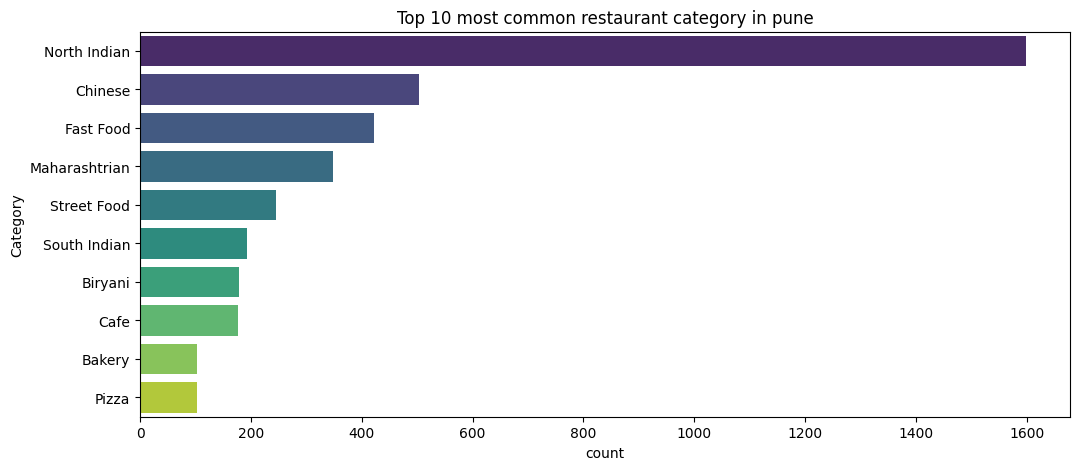

In [22]:
# find the top 10 most polular restaurant types:

plt.figure(figsize=(12,5))
sns.countplot(y=pune_df['Primary_Category'], order=pune_df['Primary_Category'].value_counts().index[:10], palette="viridis")
plt.title("Top 10 most common restaurant category in pune")
plt.xlabel('count')
plt.ylabel("Category")
plt.show()

### **3.2 Price Distribution**

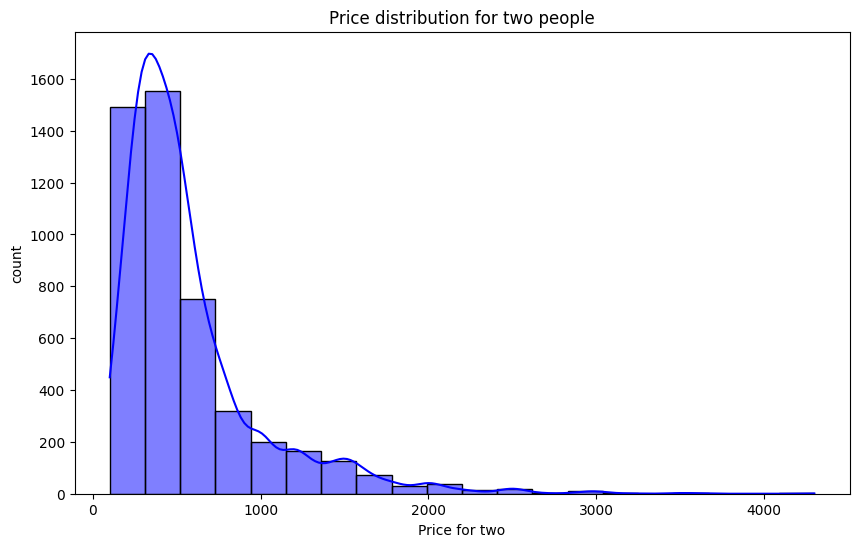

In [23]:
# Understanding price trends with histogram:

plt.figure(figsize=(10,6))
sns.histplot(pune_df['Pricing_for_2'], bins=20, kde=True, color='blue')
plt.title("Price distribution for two people")
plt.xlabel("Price for two")
plt.ylabel("count")
plt.show()

### **3.3 Correlation Between Price & Rating**

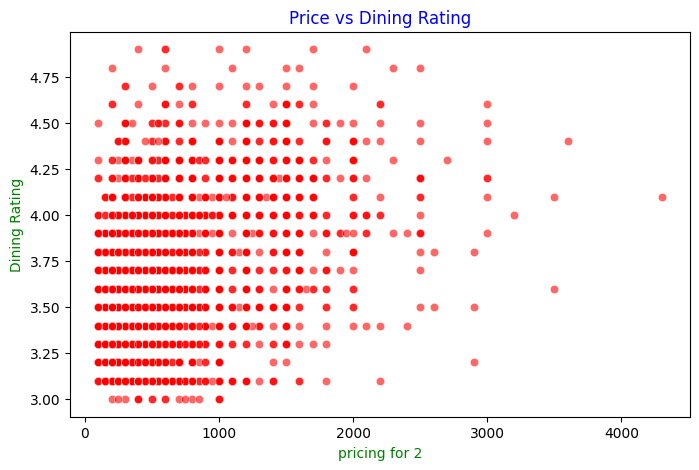

In [24]:
# Check if Expensive restaurants have better ratings:

plt.figure(figsize=(8,5))
sns.scatterplot(x=pune_df['Pricing_for_2'], y=pune_df['Dining_Rating'], alpha=0.6, color='red')
plt.title("Price vs Dining Rating",color='blue')
plt.xlabel("pricing for 2",color='green')
plt.ylabel("Dining Rating",color='green')
plt.show()

### **3.4 Word Cloud for 'Known For'

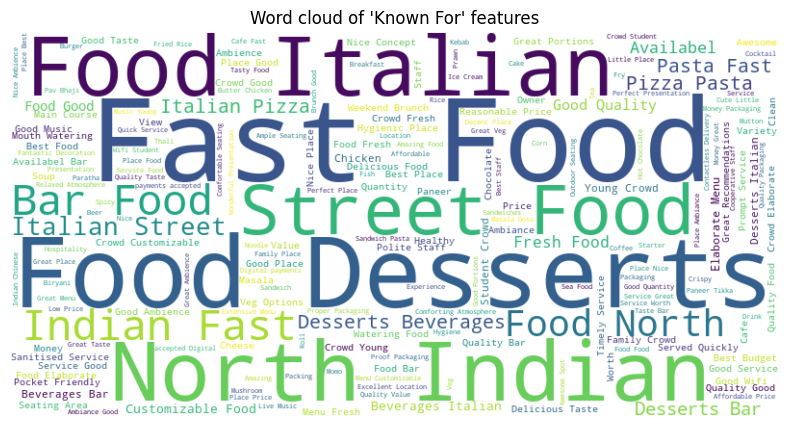

In [25]:
# Finding popular restaurant specialties:

text=" ".join(pune_df['Known_for1'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of 'Known For' features")
plt.show()

### **3.5 Best Locations For Restaurants**

C:\Users\vishwaraj khatpe\AppData\Local\Temp\ipykernel_15564\4171400978.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")


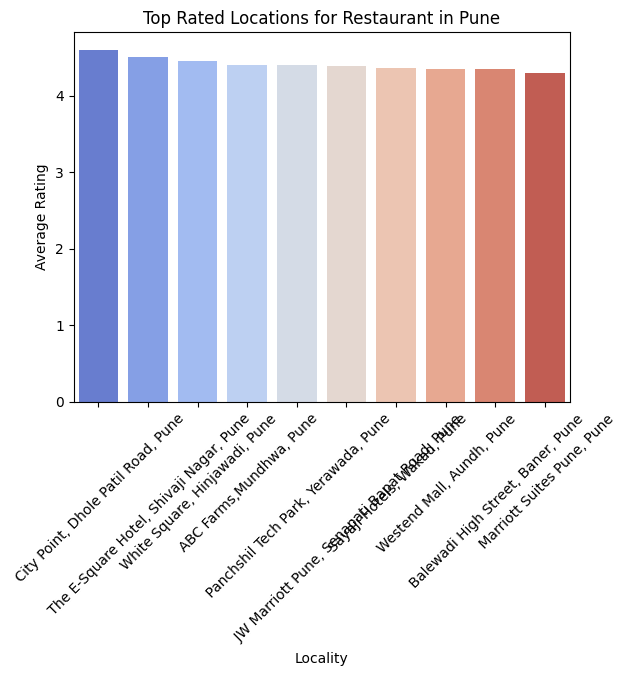

In [26]:
# Find top-rated restaurant areas


top_locations = pune_df.groupby('Locality')['Dining_Rating'].mean().sort_values(ascending=False).head(10)

plt.Figure(figsize=(12,5))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top Rated Locations for Restaurant in Pune")
plt.ylabel("Average Rating")
plt.show()

### **3.6 Delivery Rating vs Dining Rating**

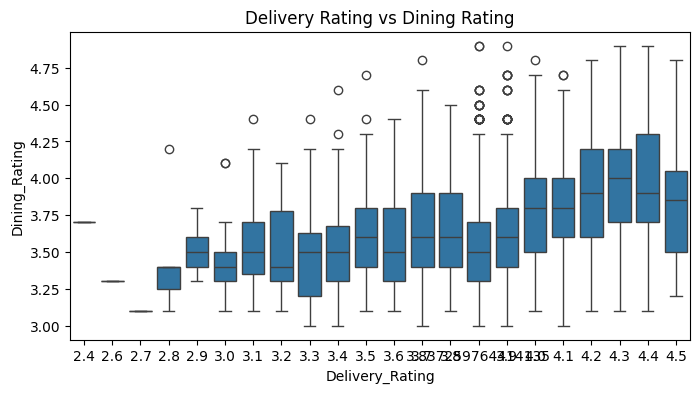

In [27]:
## Check if delivery services impact customer satisfaction


plt.figure(figsize=(8,4))
sns.boxplot(x=pune_df['Delivery_Rating'],y=pune_df['Dining_Rating'])
plt.title("Delivery Rating vs Dining Rating")
plt.show()

### 3.7 **Chain vs Independent Restaurants**

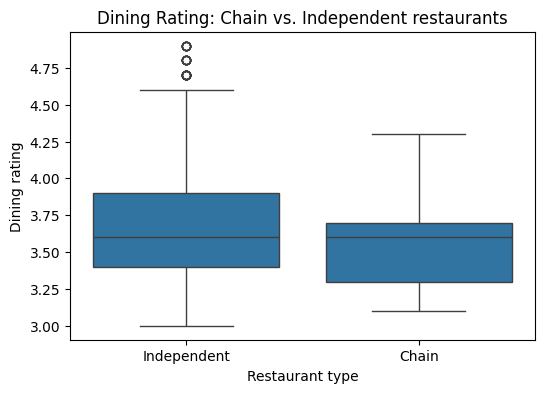

In [28]:
## Comparing big chain restaurant vs independent places:

# count how often each rstaurant name appears
restaurant_counts = pune_df['Restaurant_Name'].value_counts()

# define chain restaurants as those with more than 2 entries
chain_restaurants = restaurant_counts[restaurant_counts > 2].index

#create is_chain column
pune_df['Is_Chain'] = pune_df['Restaurant_Name'].apply(lambda name: 'Chain' if name in chain_restaurants else 'Independent')

#visualize dining rating
plt.figure(figsize=(6,4))
sns.boxplot(x='Is_Chain', y='Dining_Rating', data=pune_df)
plt.title("Dining Rating: Chain vs. Independent restaurants")
plt.xlabel('Restaurant type')
plt.ylabel("Dining rating")
plt.show()

### **3.8 Best Budget_friendly Restaurants**

## 4. **Machine Learning**

### 4.1 *****Supervised Learning -*** Linear Regression**

**Objective : Predict Dining_Rating based on features like pricing_for_2, Dining_review_count

#### Step 1: **Select Features and Target**

In [30]:
# Features and target
X = pune_df[['Pricing_for_2', 'Dining_Review_Count']]
y = pune_df['Dining_Rating']

#### **Step 2: Handle Missing values**

In [31]:
#Drop any missing values
X = X.dropna()
y = y.loc[X.index]

#### **Step 3: Train-Test Split**

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


#### **Step 4: Train Regression Model**

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### **Step 5: Evaluate Model**

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("R2 score: ", r2_score(y_test,y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))

R2 score:  0.3254426824280249
MSE:  0.09141645269780661


#### **Step 6: Plot Actual vs Predicted**

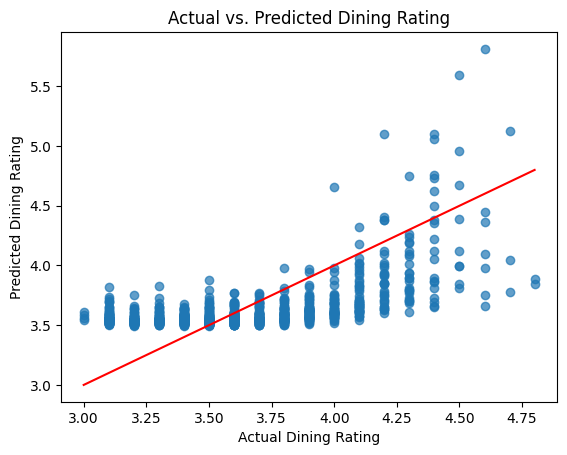

In [35]:
plt.Figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Dining Rating")
plt.ylabel("Predicted Dining Rating")
plt.title("Actual vs. Predicted Dining Rating")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal Line
plt.show()

### **4.2 Unsupervised Learning - K-Means Clustering** 

**Clustering Restaurant Based on Location and Price**

#### **Step 1: Import KMeans and required linbraries**

In [36]:
from sklearn.cluster import KMeans

#### **Step 2: Select features for clustering**

In [37]:
#cluster based on location and pricing

X_cluster = pune_df[['Latitude','Longitude','Pricing_for_2']].dropna()

#### **Step 3: Normalize the data**

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

#### **Step 4: Find the optimal number of clusters using the Elbow method**

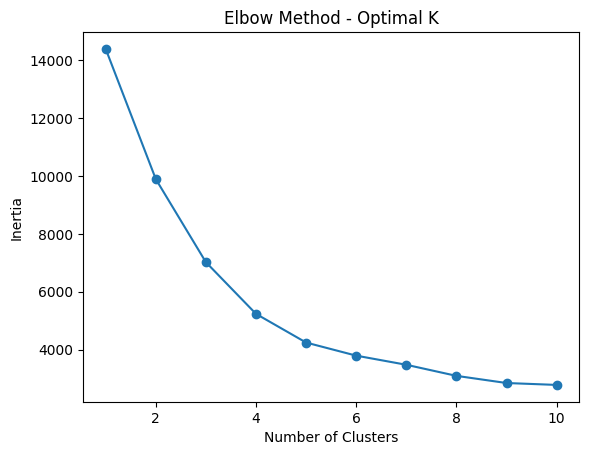

In [39]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


#### **Step 5: Apply KMeans with optimal K (say K=4)**

In [46]:
kmeans = KMeans(n_clusters=4, random_state=42)
pune_df['Cluster'] = kmeans.fit_predict(X_scaled)


#### **Step 6: Visualize the clusters**

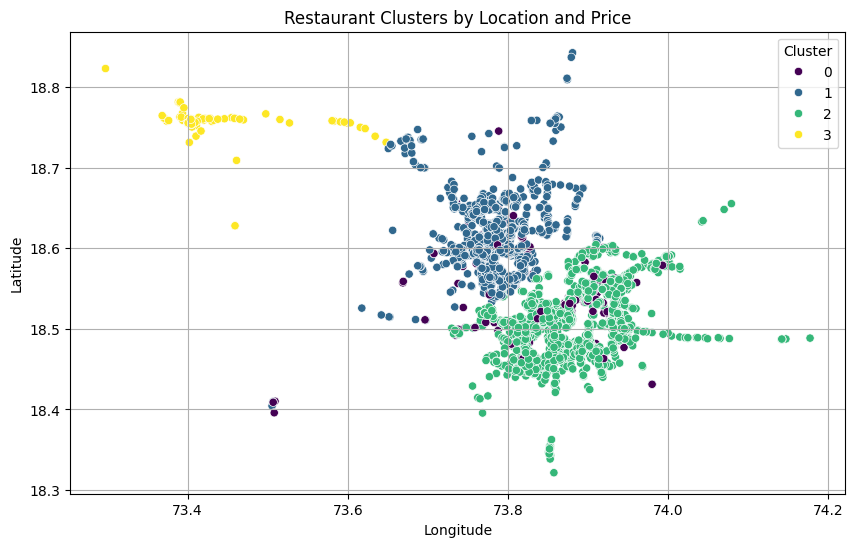

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pune_df['Longitude'], y=pune_df['Latitude'], hue=pune_df['Cluster'], palette='viridis')
plt.title("Restaurant Clusters by Location and Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
